Step 1 : Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc


Step 2: Import Dataset

In [2]:
from google.colab import files

uploaded = files.upload()

# The 'uploaded' variable is a dictionary where keys are filenames and values are file contents
for filename in uploaded.keys():
  print(f'User uploaded file "{filename}"')

# You can now use the 'filename' variable to refer to the uploaded file in subsequent code

Saving cancerdataset.xlx.xlsx to cancerdataset.xlx.xlsx
User uploaded file "cancerdataset.xlx.xlsx"


In [3]:
dataset = pd.read_excel(filename)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [13]:
dataset.head(4)

,ID,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,Diagnosis
0,1,16.02,21.1,104.5,720,0.11,0.21,0.17,0.11,0.21,0.065,1
1,2,14.12,19.5,92.3,610,0.10,0.17,0.13,0.09,0.20,0.058,0
2,3,15.76,20.7,99.8,650,0.11,0.19,0.15,0.10,0.21,0.060,1
3,4,13.95,18.8,87.2,580,0.09,0.16,0.11,0.08,0.19,0.054,0


Step 3: Exploratory Data Analysis

ID                        0
Radius_mean               0
Texture_mean              0
Perimeter_mean            0
Area_mean                 0
Smoothness_mean           0
Compactness_mean          0
Concavity_mean            0
Concave_points_mean       0
Symmetry_mean             0
Fractal_dimension_mean    0
Diagnosis                 0
dtype: int64
             ID  Radius_mean  Texture_mean  Perimeter_mean   Area_mean  \
count  50.00000    50.000000      50.00000       50.000000   50.000000   
mean   25.50000    15.117200      20.18800       95.994000  644.300000   
std    14.57738     0.916687       1.02969        6.661599   55.466574   
min     1.00000    13.800000      18.50000       85.600000  570.000000   
25%    13.25000    14.215000      19.52500       92.350000  602.500000   
50%    25.50000    15.055000      20.15000       96.400000  632.500000   
75%    37.75000    15.990000      21.05000      101.575000  698.750000   
max    50.00000    16.500000      21.80000      106.300000 

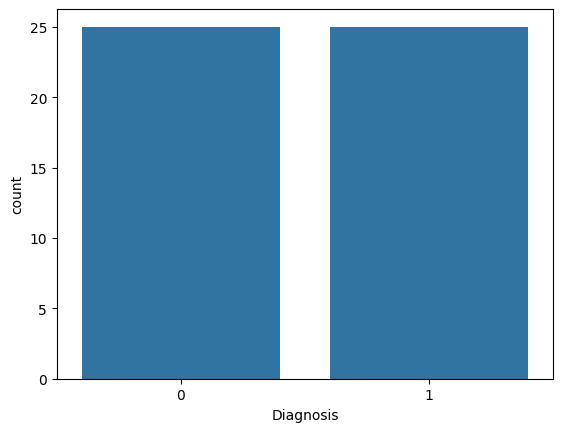

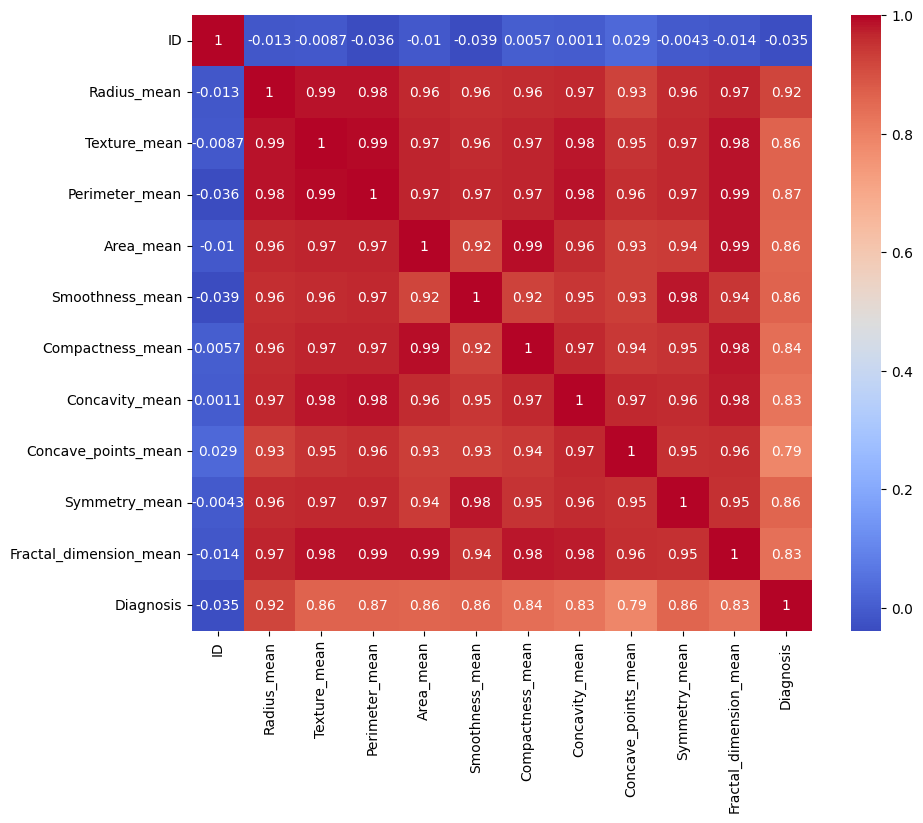

In [16]:
print(dataset.isnull().sum())
print(dataset.describe())
sns.countplot(x='Diagnosis', data=dataset)
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

Step 4 : Data Preprocessing

In [18]:
X = dataset.drop(["ID", "Diagnosis"], axis=1)
y = dataset["Diagnosis"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Step 5: Model Training

In [19]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Step 6: Predictions & Scores

In [20]:
models = {"Logistic Regression": lr, "Random Forest": rf, "SVM": svm}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"----- {name} -----")
    print("Predicted:", y_pred[:10])
    print("Actual   :", y_test.values[:10])
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

----- Logistic Regression -----
Predicted: [0 0 1 0 0 1 1 0 1 0]
Actual   : [0 0 1 0 0 1 1 0 1 0]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

----- Random Forest -----
Predicted: [0 0 1 0 0 1 1 0 1 0]
Actual   : [0 0 1 0 0 1 1 0 1 0]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00

Step 7: Confusion Matrix (Random Forest)

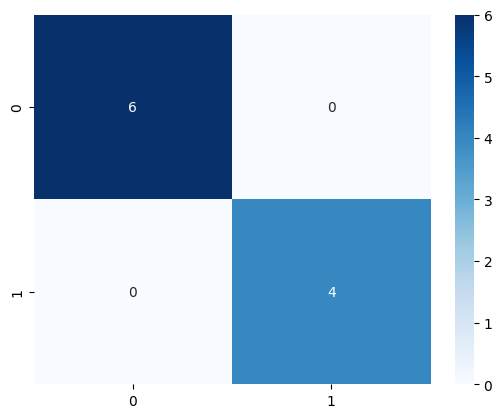

In [21]:
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


Step 7: ROC Curve & AUC (Random Forest)

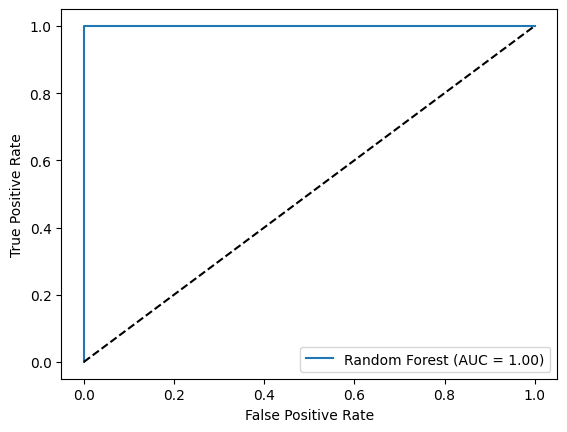

In [22]:
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Step 9: Feature Importance (Random Forest)

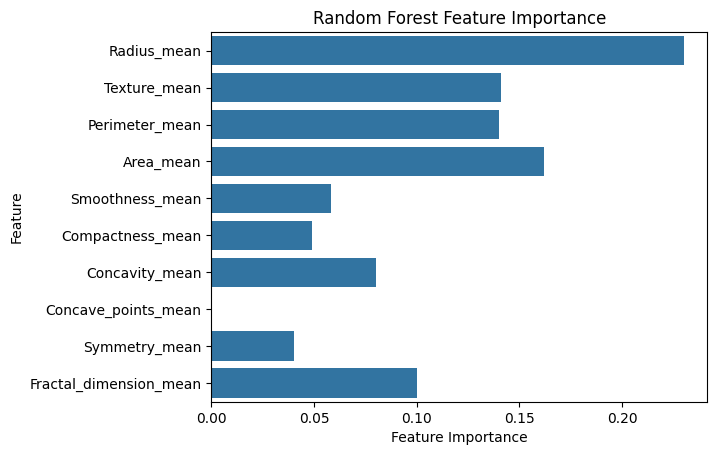

In [24]:
importances = rf.feature_importances_
feature_names = list(X.columns)
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


Step 9: Hyperparameter Tuning (Random Forest)

In [25]:
param_grid = {'n_estimators':[50,100,150],'max_depth':[None,5,10],'min_samples_split':[2,5]}
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9761904761904763
